In [2]:
import pandas as pd

df= pd.read_csv("df_sell_final.csv")
df = df.drop(['Unnamed: 0', 'wm_yr_wk_shift', 'd_num', 'd_shift'], axis =1)
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df_count = pd.read_csv("df_sell_count.csv")

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df

,date,FOODS_1_001_CA_1_evaluation,FOODS_1_001_CA_2_evaluation,FOODS_1_001_CA_3_evaluation,FOODS_1_001_CA_4_evaluation,FOODS_1_001_TX_1_evaluation,FOODS_1_001_TX_2_evaluation,FOODS_1_001_TX_3_evaluation,FOODS_1_001_WI_1_evaluation,FOODS_1_001_WI_2_evaluation,...,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,0.00,0.0,0.00,0.00,0.00,0.00,0.00,24.00,4.00,...,1,2011,d_1,No_Event,No_Event,No_Event,No_Event,0,0,0
1,2011-01-30,0.00,0.0,0.00,0.00,0.00,0.00,0.00,30.00,0.00,...,1,2011,d_2,No_Event,No_Event,No_Event,No_Event,0,0,0
2,2011-01-31,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,14.00,...,1,2011,d_3,No_Event,No_Event,No_Event,No_Event,0,0,0
3,2011-02-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6.00,...,2,2011,d_4,No_Event,No_Event,No_Event,No_Event,1,1,0
4,2011-02-02,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2,2011,d_5,No_Event,No_Event,No_Event,No_Event,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,2016-05-18,0.00,0.0,0.00,2.24,0.00,0.00,2.24,11.20,0.00,...,5,2016,d_1937,No_Event,No_Event,No_Event,No_Event,0,0,0
1937,2016-05-19,6.72,0.0,4.48,6.72,0.00,0.00,0.00,8.96,0.00,...,5,2016,d_1938,No_Event,No_Event,No_Event,No_Event,0,0,0
1938,2016-05-20,6.72,0.0,6.72,0.00,4.48,11.20,2.24,2.24,0.00,...,5,2016,d_1939,No_Event,No_Event,No_Event,No_Event,0,0,0
1939,2016-05-21,0.00,0.0,0.00,4.48,2.24,4.48,2.24,89.60,2.24,...,5,2016,d_1940,No_Event,No_Event,No_Event,No_Event,0,0,0


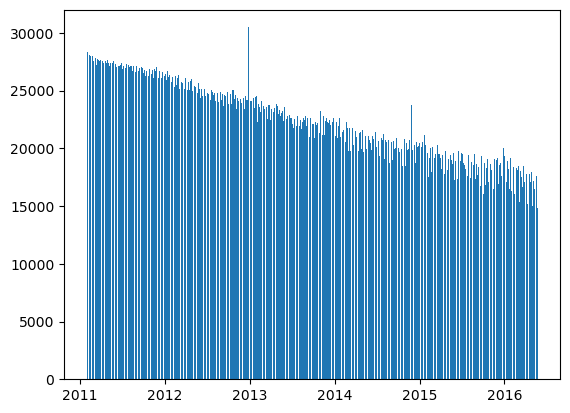

In [5]:
zero_check_df = (df ==0).sum(axis = 1)
zero_check_df
plt.bar(x=df['date'],height=zero_check_df.values)
plt.show()

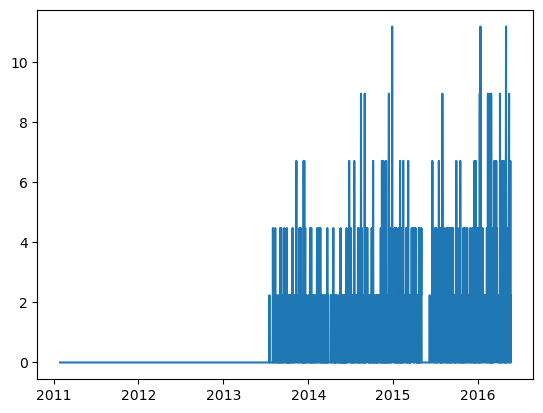

In [6]:
plt.plot(df['date'], df['FOODS_1_001_CA_1_evaluation'])
plt.show()

We can see that there are items that are not being sold until to some point

In [7]:
multi_items = ['FOODS_3_083_WI_3_evaluation', 'HOBBIES_1_084_WI_3_evaluation', 'HOUSEHOLD_2_085_WI_3_evaluation']
#Find the first non-zero data of each item
for item in multi_items:
    print(df['date'][df[item] != 0].min())

2011-01-29 00:00:00
2011-01-30 00:00:00
2013-05-09 00:00:00


In [8]:
def sell_start_date(df,item):
    starting_date = df['date'][df[item] != 0].min()
    return starting_date

In [9]:
for item in multi_items:
    print(sell_start_date(df,item))

2011-01-29 00:00:00
2011-01-30 00:00:00
2013-05-09 00:00:00


In [10]:
df[['date', 'FOODS_1_001_CA_1_evaluation']]

,date,FOODS_1_001_CA_1_evaluation
0,2011-01-29,0.00
1,2011-01-30,0.00
2,2011-01-31,0.00
3,2011-02-01,0.00
4,2011-02-02,0.00
...,...,...
1936,2016-05-18,0.00
1937,2016-05-19,6.72
1938,2016-05-20,6.72
1939,2016-05-21,0.00


C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

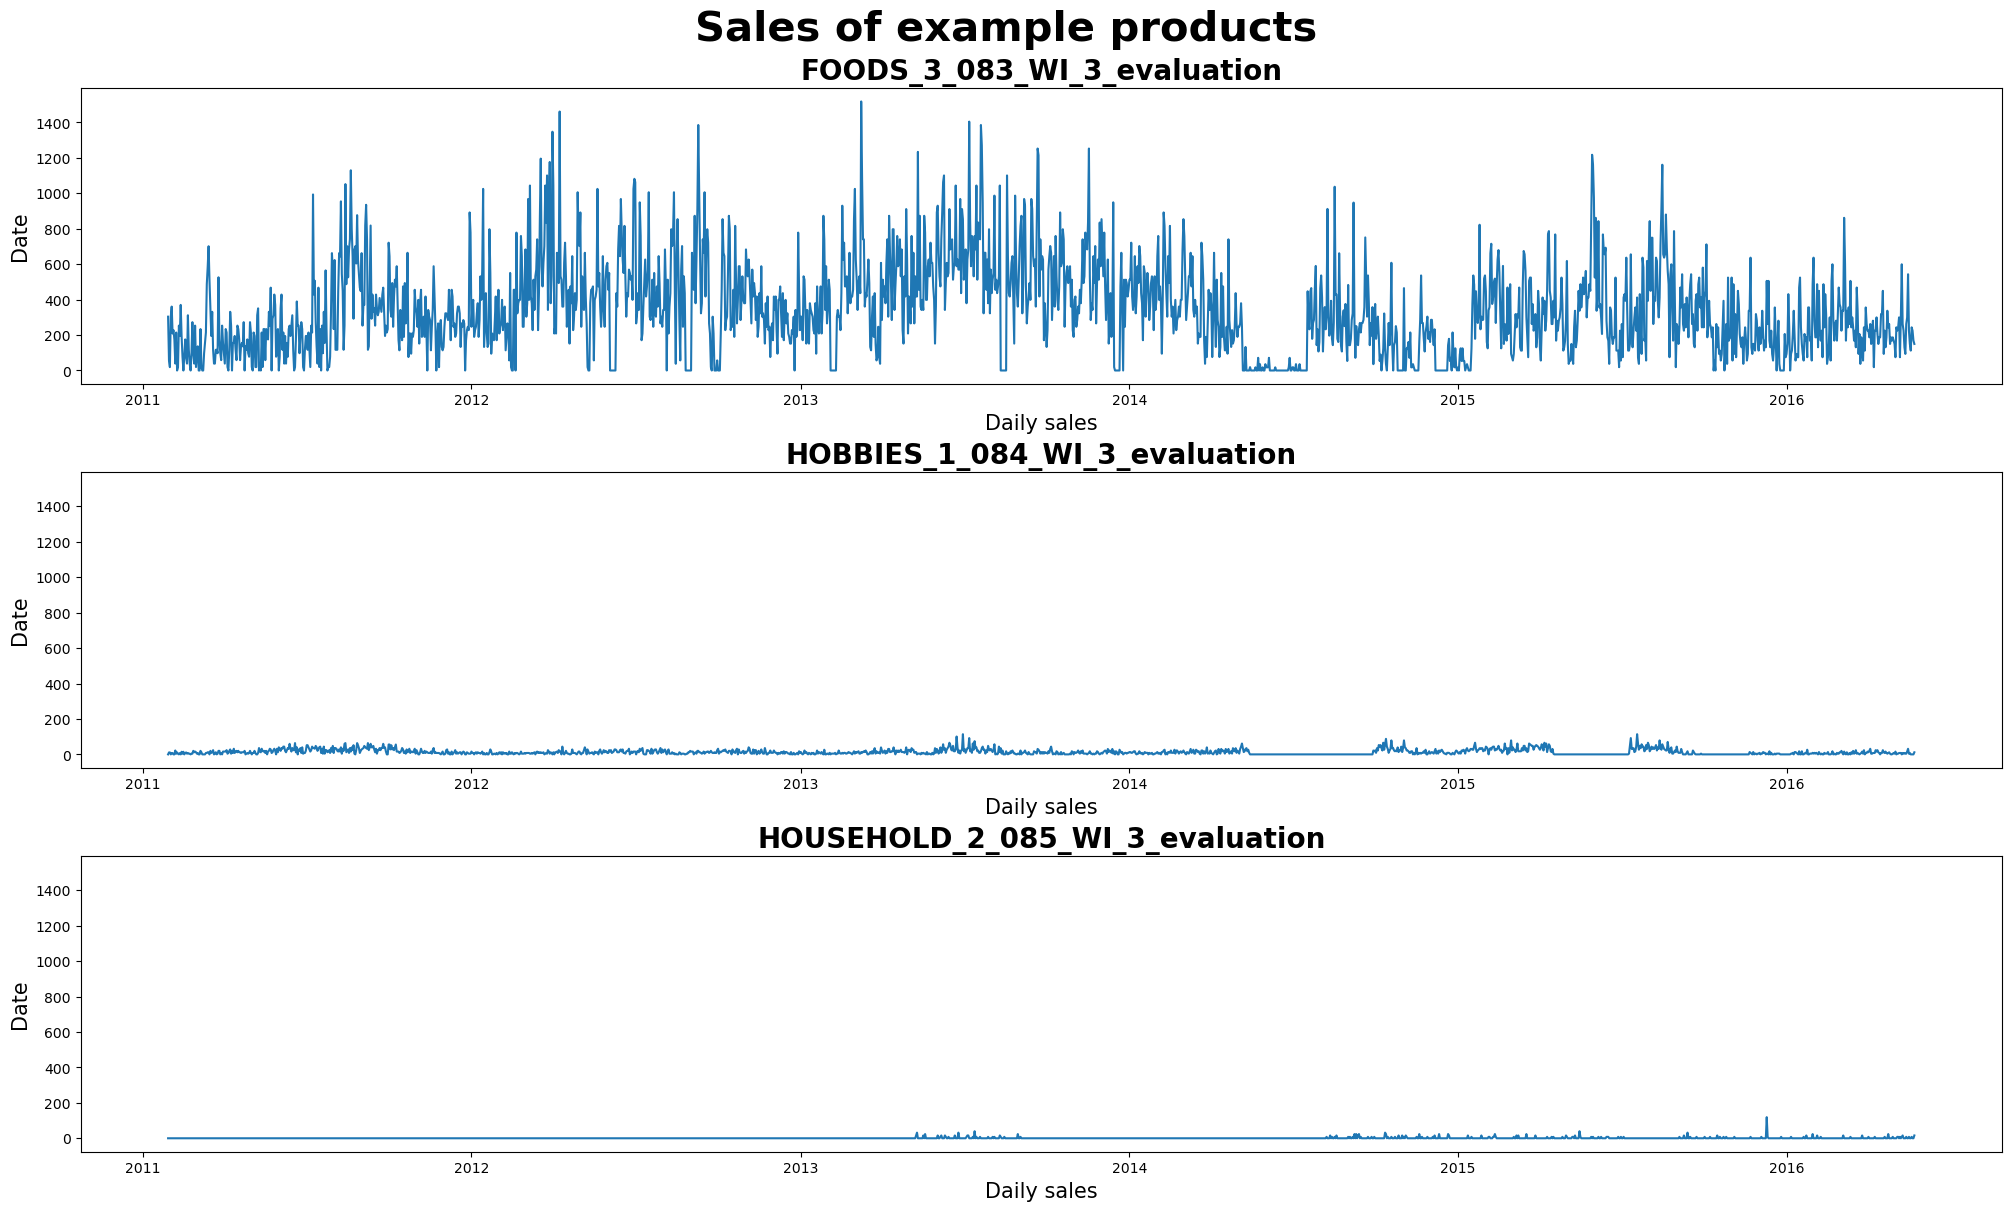

In [11]:

fig,ax =  plt.subplots(nrows= 3, ncols=1, figsize = ( 20, 12), constrained_layout=True, sharey=True) 

fig.suptitle('Sales of example products', fontsize = 30, weight = 'bold')

for i in range(0,len(multi_items)):
    graph_item = sns.lineplot(x = "date", y = multi_items[i],data = df[['date', multi_items[i]]], 
                 ax = ax[i]) 
    graph_item.set_title(multi_items[i], size = 20, weight = 'bold')
    graph_item.set_xlabel("Daily sales", fontsize=15)
    graph_item.set_ylabel("Date", fontsize=15)


## Transform the data


In [94]:
df_transform = df[['date', 'FOODS_3_083_WI_3_evaluation']]
df_transform
df_transform_test = df_transform

,date,FOODS_3_083_WI_3_evaluation
0,2011-01-29,303.68
1,2011-01-30,56.94
2,2011-01-31,18.98
3,2011-02-01,303.68
4,2011-02-02,360.62
...,...,...
1936,2016-05-18,112.38
1937,2016-05-19,243.49
1938,2016-05-20,224.76
1939,2016-05-21,168.57


In [143]:
import numpy as np

window=[7,14,28,35,42]
for i in window:
        df_transform_test['rolling_mean_'+str(i)] =  df_transform_test.loc[:,'FOODS_3_083_WI_3_evaluation'].rolling(window=i, min_periods=1).mean()
        df_transform_test['_FOODS_3_083_WI_3_evaluation'] =  df_transform_test.loc[:,'_FOODS_3_083_WI_3_evaluation'].replace(0, np.nan).fillna(df_transform_test[('rolling_mean_'+str(i))])



C:\Users\yohei\AppData\Local\Temp\ipykernel_35256\2427240551.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transform_test['rolling_mean_'+str(i)] =  df_transform_test.loc[:,'FOODS_3_083_WI_3_evaluation'].rolling(window=i, min_periods=1).mean()
C:\Users\yohei\AppData\Local\Temp\ipykernel_35256\2427240551.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transform_test['_FOODS_3_083_WI_3_evaluation'] =  df_transform_test.loc[:,'_FOODS_3_083_WI_3_evaluation'].replace(0, np.nan).fillna(df_transfor

In [144]:
df_transform_test

,date,FOODS_3_083_WI_3_evaluation,rolling_avg,_FOODS_3_083_WI_3_evaluation,rolling_mean_7,rolling_mean_14,rolling_mean_28,rolling_mean_35,rolling_mean_42
0,2011-01-29,303.68,303.680000,303.68,303.680000,303.680000,303.680000,303.680000,303.680000
1,2011-01-30,56.94,180.310000,56.94,180.310000,180.310000,180.310000,180.310000,180.310000
2,2011-01-31,18.98,126.533333,18.98,126.533333,126.533333,126.533333,126.533333,126.533333
3,2011-02-01,303.68,170.820000,303.68,170.820000,170.820000,170.820000,170.820000,170.820000
4,2011-02-02,360.62,208.780000,360.62,208.780000,208.780000,208.780000,208.780000,208.780000
...,...,...,...,...,...,...,...,...,...
1936,2016-05-18,112.38,254.728000,112.38,240.814286,255.530714,228.773571,232.252000,224.760000
1937,2016-05-19,243.49,254.728000,243.49,262.220000,251.517143,230.780357,233.857429,230.111429
1938,2016-05-20,224.76,249.733333,224.76,256.868571,262.220000,226.766786,231.181714,230.111429
1939,2016-05-21,168.57,255.976667,168.57,238.138571,252.855000,224.091071,226.900571,228.773571


In [142]:
df_transform_test.loc[df_transform_test['_FOODS_3_083_WI_3_evaluation'] == 0]

,date,FOODS_3_083_WI_3_evaluation,rolling_avg,_FOODS_3_083_WI_3_evaluation,rolling_mean_7,rolling_mean_14,rolling_mean_28,rolling_mean_35,rolling_mean_42


C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

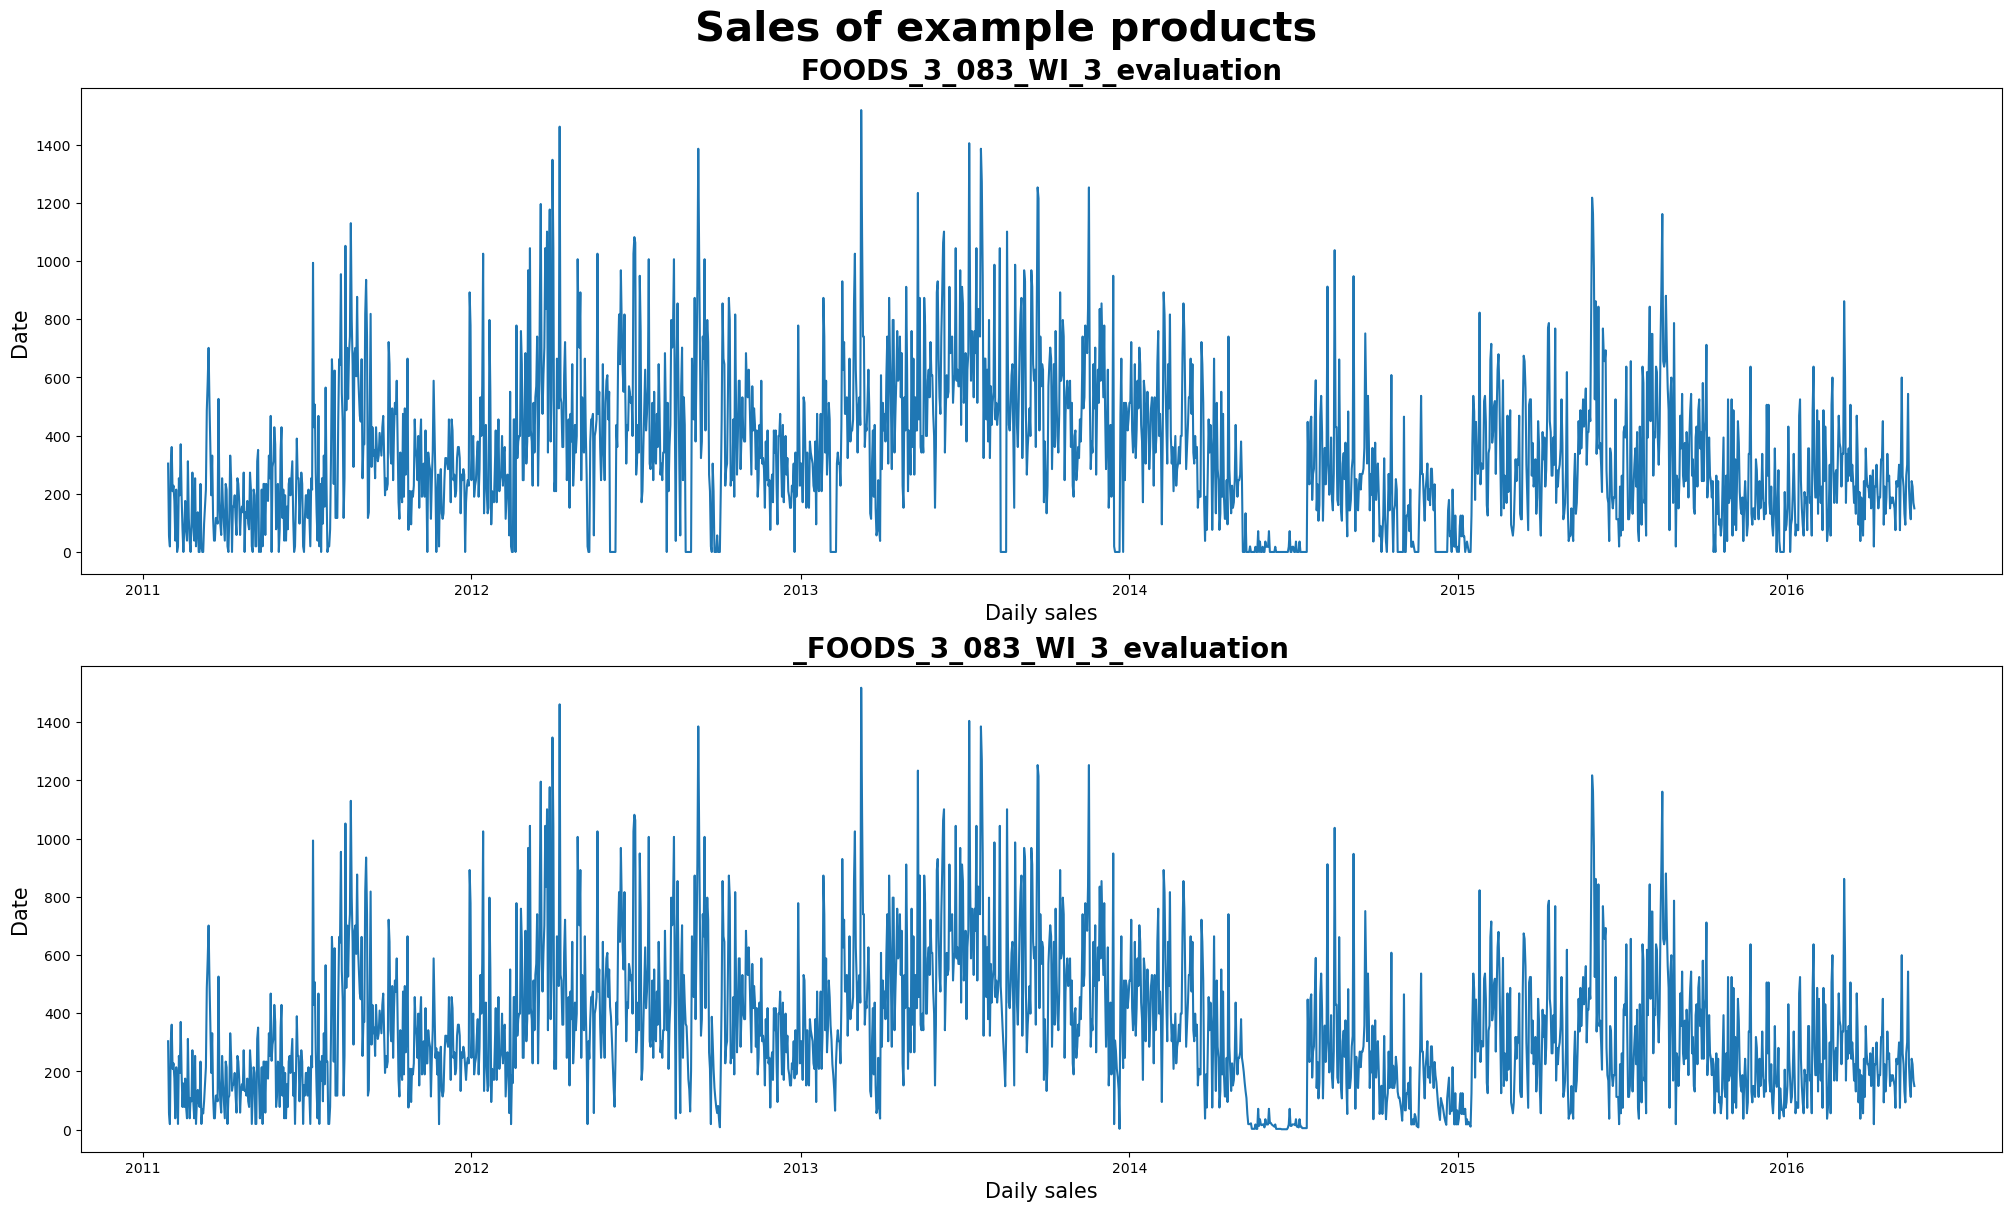

In [145]:

fig,ax =  plt.subplots(nrows= 2, ncols=1, figsize = ( 20, 12), constrained_layout=True, sharey=True) 

fig.suptitle('Sales of example products', fontsize = 30, weight = 'bold')
test_list = ['FOODS_3_083_WI_3_evaluation', '_FOODS_3_083_WI_3_evaluation']
for i in range(0,len(test_list)):
    graph_item = sns.lineplot(x = "date", y = test_list[i],data = df_transform_test[['date', test_list[i]]], 
                 ax = ax[i]) 
    graph_item.set_title(test_list[i], size = 20, weight = 'bold')
    graph_item.set_xlabel("Daily sales", fontsize=15)
    graph_item.set_ylabel("Date", fontsize=15)

In [146]:
df_transform_test.set_index('date', inplace = True)


## Autocorrelation of the graph (ACF) and find the Correlaogram graph

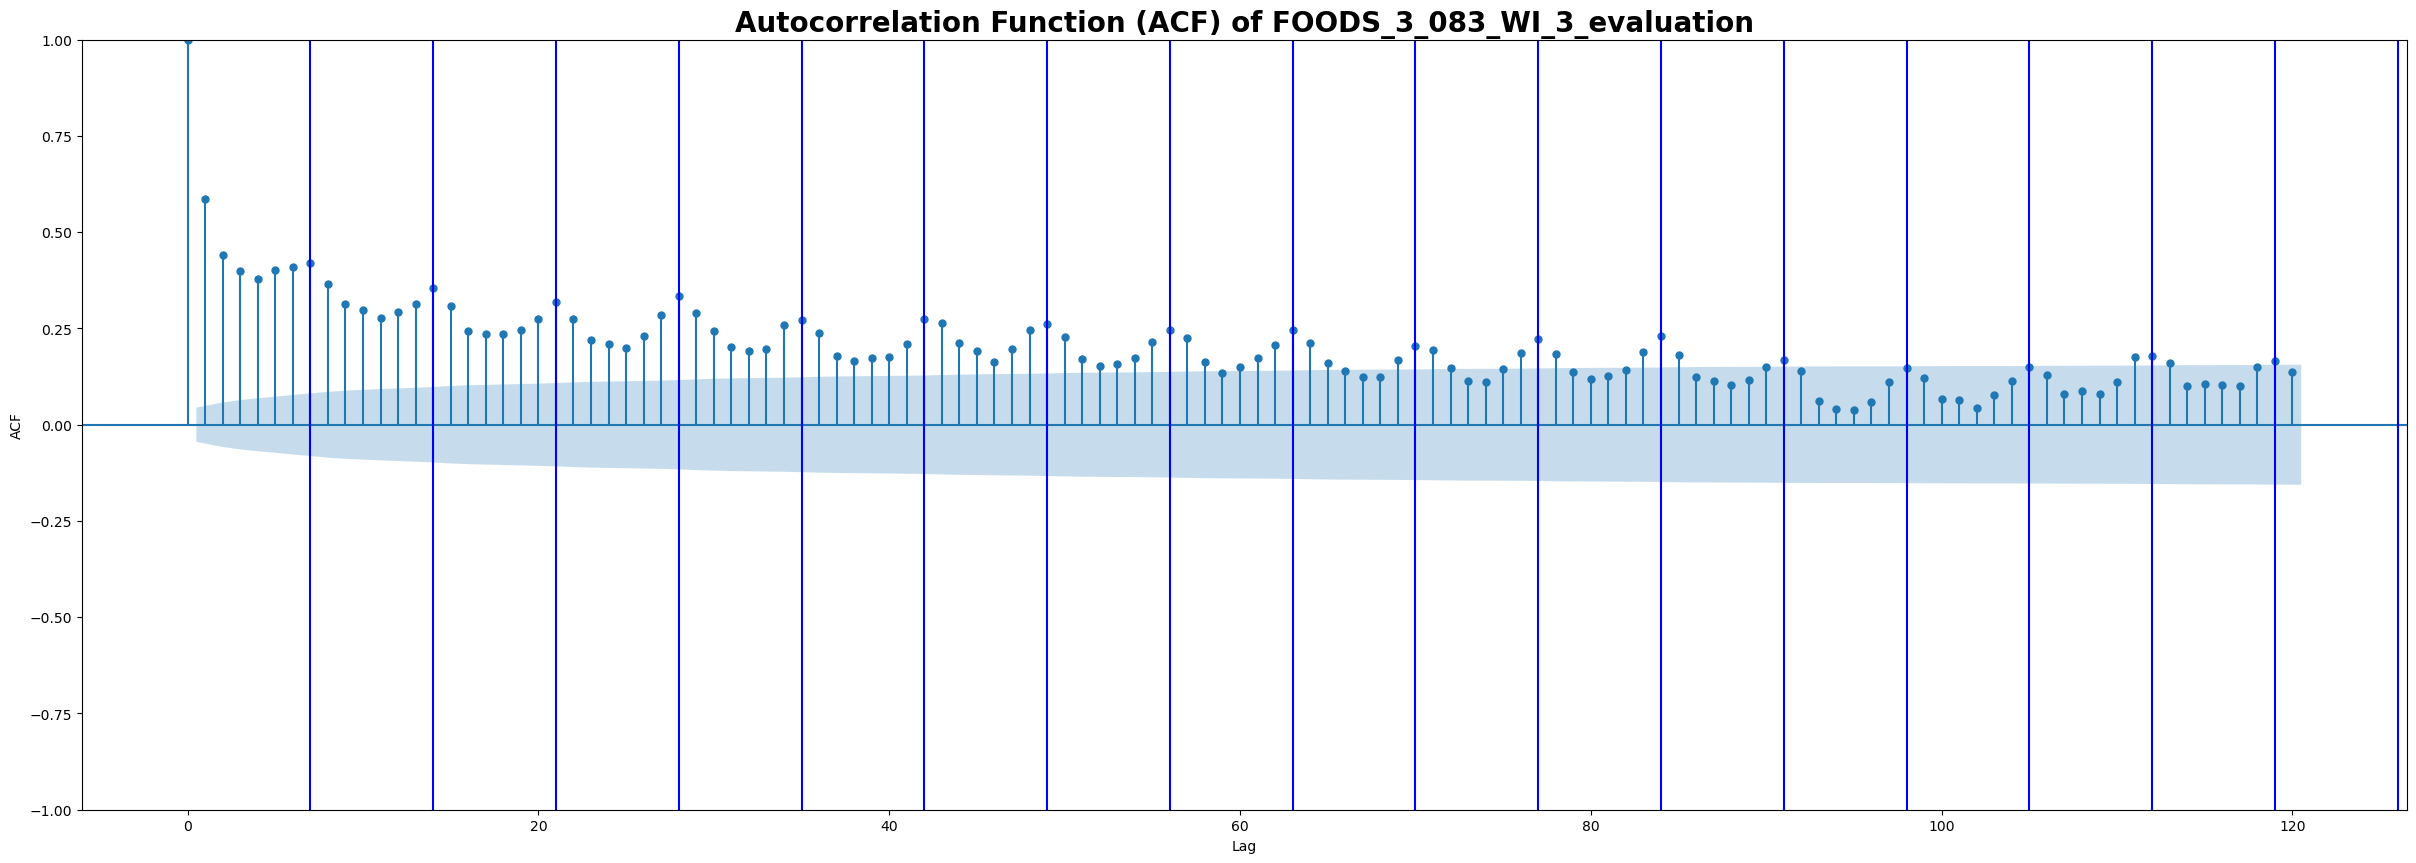

In [85]:
from statsmodels.graphics.tsaplots import plot_acf



fig,ax =  plt.subplots(nrows= 2, ncols=1, figsize = ( 20, 12), constrained_layout=True, sharey=True) 

fig.suptitle('utocorrelation Function (ACF) of FOODS_3_083_WI_3_evaluation comparison', fontsize = 30, weight = 'bold')

test_list = ['FOODS_3_083_WI_3_evaluation', '_FOODS_3_083_WI_3_evaluation']
for i in range(0,len(test_list)):
     #Plot ACF
    plot_acf(df_transform_test[test_list[i]], lags=lag_max, ax = ax[i]) 
    graph_item.set_title(test_list[i], size = 20, weight = 'bold')
    graph_item.set_xlabel("Daily sales", fontsize=15)
    graph_item.set_ylabel("Date", fontsize=15)

#Plot vertical line to represent 7 days
delay_7day_point = []
lag_max = 120
i = 0
while( i <120):
    i = i + 7
    plt.axvline(x = i, color = 'b', label = 'axvline - full height')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF) of FOODS_3_083_WI_3_evaluation', fontsize = 20, weight = 'bold')
plt.show()

[7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98, 105, 112, 119, 126]

In [ ]:
def evaluating_item(product_table, product_name, sale_start_date):

    #LCreating ags to the evaluating table
    lags = [1,2,3,6,12,24,36]
    added_column = []
    for i in lags:
        product_table['lag_' + str(i)]=product_table.groupby(['id'])['demand'].shift(i)
        added_column.append(i)

    #Rolling-Mean
    window=[7,14,28,35,42]
    for i in tqdm(window):
        product_table['rolling_median_'+str(i)]=product_table.groupby(['id'])['demand'].transform(lambda s: s.rolling(i,center=False).median())
          added_column.append(i)

    #Replacing 'NaN' values for lag and rolling_ mean columns data with zero
    for i in added_column:
        product_table[i]=product_table[i].fillna(0)

In [48]:
df_test = df.copy()
multi_items = ['FOODS_3_083_WI_3_evaluation', 'HOBBIES_1_084_WI_3_evaluation', 'HOUSEHOLD_2_085_WI_3_evaluation']

max_consecutive_zero = pd.DataFrame(columns=['item_ID', 'consecutive_zeros'])
max_consecutive_zero['item_ID'] = multi_items
for item in multi_items:
    consecutive_zeros =[]
    consecutive_zeros= (df[item] == 0).astype(int).groupby((df[item] != 0).cumsum()).cumsum()
    max_consecutive_zero['consecutive_zeros'].loc[max_consecutive_zero['item_ID'] == item] = consecutive_zeros.max()

In [51]:
df_test['FOODS_3_083_WI_3_evaluation'][0]

303.68

In [12]:
max_consecutive_zero

,item_ID,consecutive_zeros
0,FOODS_3_083_WI_3_evaluation,14
1,HOBBIES_1_084_WI_3_evaluation,137
2,HOUSEHOLD_2_085_WI_3_evaluation,831


In [13]:
def non_sale_day_max(df,item):
    consecutive_zeros =[]
    consecutive_zeros= (df[item] == 0).astype(int).groupby((df[item] != 0).cumsum()).cumsum()
    maximum_non_sale_date =  consecutive_zeros.max()
    return maximum_non_sale_date

In [14]:
df_test = df.copy()
multi_items = ['FOODS_3_083_WI_3_evaluation', 'HOBBIES_1_084_WI_3_evaluation', 'HOUSEHOLD_2_085_WI_3_evaluation']

max_consecutive_zero = pd.DataFrame(columns=['item_ID', 'consecutive_zeros'])
max_consecutive_zero['item_ID'] = multi_items
for item in multi_items:
    max_consecutive_zero['consecutive_zeros'].loc[max_consecutive_zero['item_ID'] == item] = non_sale_day_max(df,item)

In [15]:
max_consecutive_zero

,item_ID,consecutive_zeros
0,FOODS_3_083_WI_3_evaluation,14
1,HOBBIES_1_084_WI_3_evaluation,137
2,HOUSEHOLD_2_085_WI_3_evaluation,831


In [16]:
multi_items = ['FOODS_3_083_WI_3_evaluation', 'HOBBIES_1_084_WI_3_evaluation', 'HOUSEHOLD_2_085_WI_3_evaluation']

max_consecutive_zero = pd.DataFrame(columns=['item_ID', 'consecutive_zeros'])

max_consecutive_zero['item_ID'] = multi_items
for item in multi_items:
    temp_df = df.loc[df['date'] >= sell_start_date(df, item)].copy()
    max_consecutive_zero['consecutive_zeros'].loc[max_consecutive_zero['item_ID'] == item] = non_sale_day_max(temp_df,item)

In [17]:
max_consecutive_zero

,item_ID,consecutive_zeros
0,FOODS_3_083_WI_3_evaluation,14
1,HOBBIES_1_084_WI_3_evaluation,137
2,HOUSEHOLD_2_085_WI_3_evaluation,339


In [18]:
all_items = []

for col in df.columns:
    if (len(col.split('_')) == 6):
        if (col.split('_')[5] == 'evaluation'):
            all_items.append(col)

In [19]:
max_consecutive_zero = pd.DataFrame(columns=['item_ID', 'consecutive_zeros'])

max_consecutive_zero['item_ID'] = multi_items
for item in all_items:
    temp_df = df.loc[df['date'] >= sell_start_date(df, item)].copy()
    max_consecutive_zero['consecutive_zeros'].loc[max_consecutive_zero['item_ID'] == item] = non_sale_day_max(temp_df,item)

In [20]:
max_consecutive_zero.loc[max_consecutive_zero['consecutive_zeros'].idmax()]

AttributeError: 'Series' object has no attribute 'idmax'

In [ ]:
for item in all_items:
    locater = max_consecutive_zero['consecutive_zeros'].loc[max_consecutive_zero['item_ID'] == item]
    if(locater < 7):
        

In [ ]:
# single_df_linear = df.reset_index()
# single_df_linear

# single_df_linear = df.groupby(['event_name_1'])['d'].count().to_frame('event type')
# event_name_list = pd.DataFrame()
# event_name_list['event'] = single_df_linear.index

In [41]:
import numpy as np
data5 = {
    'date': pd.date_range('2023-01-01', '2023-02-16'),
    'item_id_1': [1, 2, 0, 0, 0, 3, 4, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 0, 0, 0, 0, 0, 0, 0],
    'item_id_2': [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'item_id_3': [0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'item_id_4': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

df5 = pd.DataFrame(data5)


non_zero_indices = df5['item_id_1'].index[df5['item_id_1'] != 0]
consecutive_zeros = (df5['item_id_1'] == 0).astype(int).groupby()
# Initialize to store non-zero counts
non_zero_count = pd.Series(index=df5['item_id_1'].index)  
modified_series = df5['item_id_1'].copy()
for i in consecutive_zeros.index:
    print(i)
# max_consecutive_zeros = consecutive_zeros.groupby((consecutive_zeros != 0).cumsum()).max()

# for i in consecutive_zeros.index:
#     if consecutive_zeros[i] > 0:
#         # Cou nt the number of non-zero values preceding consecutive zeros
#         non_zero_count.iloc[i] = len(non_zero_indices[:consecutive_zeros[i]])
#         #Find the average of preceding non-zero values
#         if (consecutive_zeros[i] > 1 and (max_consecutive_zeros[i] != max_consecutive_zeros[i-1])):
#             print(non_zero_indices[i] )
#             print(consecutive_zeros[i])
#             #non-zero conditions
#             if (non_zero_indices[i] > 30): 
#                 if (non_zero_indices[i] >= 7) and (non_zero_indices[i] < 14):
#                     avg_non_zero = np.mean(df5['item_id_1'][non_zero_indices[max(0, consecutive_zeros[i] - 7):consecutive_zeros[i]]])
#                 elif (non_zero_indices[i] >= 14) and (non_zero_indices[i] < 30):
#                     avg_non_zero = np.mean(df5['item_id_1'][non_zero_indices[max(0, consecutive_zeros[i] - 14):consecutive_zeros[i]]])
#                 elif (non_zero_indices[i] >= 30):
#                     avg_non_zero = np.mean(df5['item_id_1'][non_zero_indices[max(0, consecutive_zeros[i] - 30):consecutive_zeros[i]]])
#             elif (non_zero_indices[i] > 14): 
#                 if (non_zero_indices[i] >= 7) and (non_zero_indices[i] < 14):
#                     avg_non_zero = np.mean(df5['item_id_1'][non_zero_indices[max(0, consecutive_zeros[i] - 7):consecutive_zeros[i]]])
#                 elif (non_zero_indices[i] >= 14):
#                     avg_non_zero = np.mean(df5['item_id_1'][non_zero_indices[max(0, consecutive_zeros[i] - 14):consecutive_zeros[i]]])
#             elif (consecutive_zeros[i] > 7): 
#                 if (non_zero_indices[i] >= 7):
#                     avg_non_zero = np.mean(df5['item_id_1'][non_zero_indices[max(0, consecutive_zeros[i] - 7):consecutive_zeros[i]]])
#             else:
#                 avg_non_zero = np.mean(df5['item_id_1'][non_zero_indices[max(0, consecutive_zeros[i] - non_zero_indices[i]):consecutive_zeros[i]]])
#         #Replace consecutive zeros with the average
#         elif (consecutive_zeros[i] > 1 and (max_consecutive_zeros[i] == max_consecutive_zeros[i-1])):
#             modified_series[i] = avg_non_zero
#     else:
#         non_zero_count[i] = 0

# for item_id in df5.columns:
#     if (item_id != 'date'):
#         data5[item_id + '_modified'] = replace_consecutive_zeros_with_average(df5[item_id])


AttributeError: 'SeriesGroupBy' object has no attribute 'index'

In [40]:
df5

,date,item_id_1,item_id_2,item_id_3,item_id_4
0,2023-01-01,1,0,0,0
1,2023-01-02,2,0,0,0
2,2023-01-03,0,0,0,0
3,2023-01-04,0,0,0,0
4,2023-01-05,0,5,0,0
5,2023-01-06,3,0,0,0
6,2023-01-07,4,0,0,0
7,2023-01-08,0,0,0,0
8,2023-01-09,0,0,8,0
9,2023-01-10,0,0,0,0


In [ ]:
consecutive_zeros

In [ ]:
non_zero_indices

In [ ]:
# event_name_list

In [ ]:
# single_df_linear = df.groupby(['event_type_1'])['d'].count().to_frame('event type')
# event_type_list = pd.DataFrame()
# event_type_list['event_type'] = single_df_linear.index
# event_type_list

In [ ]:
# single_df_linear = df.groupby(['weekday'])['d'].count().to_frame('Week days')
# weekday_list = pd.DataFrame()
# weekday_list['weekday'] = single_df_linear.index
# weekday_list

In [ ]:
# import numpy as np
# df['event_name_2_index'] = df.apply(lambda x: (np.where(x['event_name_2'] == event_name_list['event'])[0][0]), axis =1)
# df['event_type_1_index'] = df.apply(lambda x: (np.where(x['event_type_1'] == event_type_list['event_type'])[0][0]), axis =1)
# df['event_type_2_index'] = df.apply(lambda x: (np.where(x['event_type_2'] == event_type_list['event_type'])[0][0]), axis =1)
# df['weekday_index'] = df.apply(lambda x: (np.where(x['weekday'] == weekday_list['weekday'])[0][0]), axis =1)

In [ ]:
# df = df.drop(['weekday','d','event_name_1','event_type_1','event_name_2','event_type_2'], axis =1)

Test to show with multiple items in 1 time serires graph

In [ ]:
multi_items = ['FOODS_3_083_WI_3_evaluation', 'FOODS_3_084_WI_3_evaluation', 'FOODS_3_085_WI_3_evaluation']

dim = (30,7)
plt.subplots(figsize = dim)

for item in multi_items:
    plt.plot(df['date'], df[item], label = item)
plt.legend(multi_items, prop ={'size':18})
plt.xticks (rotation = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Total_sell', fontsize = 15)
plt.show()

Testing with short term

In [21]:
df_test = df.copy()
df_test = df_test.set_index('date')
df_test = df_test.loc['2015/04/01':,:]

In [22]:
WI = []
TX = []
CA = []
items = []
calender = []

for col in df_test.columns:
    if (len(col.split('_')) == 6):
        if (col.split('_')[3] == 'WI'):
            WI.append(col)
        elif (col.split('_')[3] == 'TX'):
            TX.append(col)
        elif (col.split('_')[3] == 'CA'):
            CA.append(col)
        elif (col.split('_')[5] == 'evaluation'):
            items.append(col)
    else:
        calender.append(col)

create a list with all the stores

In [23]:
for col in df_test.columns:
    
    if (len(col.split('_')) == 6):
        if (col.split('_')[3] == 'WI'):
            WI.append(col)
        elif (col.split('_')[3] == 'TX'):
            TX.append(col)
        elif (col.split('_')[3] == 'CA'):
            CA.append(col)
        elif (col.split('_')[5] == 'evaluation'):
            items.append(col)
    else:
        calender.append(col)

In [24]:
eva_item =  "FOODS_3_083_WI_3_evaluation"
eva_df = df_test.loc[:,eva_item]

In [25]:
train = eva_df['2015/04/01':'2016/04/20']
test = eva_df['2016/04/21':]

In [26]:
train.loc[train == 0]

date
2015-10-12    0.0
2015-10-14    0.0
2015-10-24    0.0
2015-12-21    0.0
2015-12-25    0.0
2015-12-26    0.0
2015-12-27    0.0
2015-12-28    0.0
2015-12-29    0.0
2016-01-05    0.0
Name: FOODS_3_083_WI_3_evaluation, dtype: float64

Use autoarima

In [27]:
from pmdarima.arima import auto_arima
auto_model = auto_arima(y=train, start_p=0, start_q=0, max_p=5,
                        max_q=5, start_P=0, start_Q=0, max_P=5,
                        max_Q=5, m=1, max_order=None,
                        trace=True)
    

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5214.308, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5162.692, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5105.984, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5212.312, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5093.283, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5095.283, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5095.283, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5094.381, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5143.463, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5094.354, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5091.305, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5103.988, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5160.694, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5093.304, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [28]:
prediction, confint = auto_model.predict(n_periods=test.size, return_conf_int=True)
prediction

2016-04-21    194.294376
2016-04-22    210.704290
2016-04-23    214.966186
2016-04-24    216.073063
2016-04-25    216.360536
2016-04-26    216.435197
2016-04-27    216.454587
2016-04-28    216.459623
2016-04-29    216.460931
2016-04-30    216.461271
2016-05-01    216.461359
2016-05-02    216.461382
2016-05-03    216.461388
2016-05-04    216.461389
2016-05-05    216.461390
2016-05-06    216.461390
2016-05-07    216.461390
2016-05-08    216.461390
2016-05-09    216.461390
2016-05-10    216.461390
2016-05-11    216.461390
2016-05-12    216.461390
2016-05-13    216.461390
2016-05-14    216.461390
2016-05-15    216.461390
2016-05-16    216.461390
2016-05-17    216.461390
2016-05-18    216.461390
2016-05-19    216.461390
2016-05-20    216.461390
2016-05-21    216.461390
2016-05-22    216.461390
Freq: D, dtype: float64

In [29]:
confint

array([[-155.44346616,  544.03221881],
       [-166.06481559,  587.47339526],
       [-171.42683087,  601.3592032 ],
       [-176.89104223,  609.0371691 ],
       [-182.42507448,  615.14614603],
       [-187.92919548,  620.79958863],
       [-193.37228445,  626.28145862],
       [-198.74754492,  631.66679109],
       [-204.05505478,  636.9769168 ],
       [-209.2966632 ,  642.21920459],
       [-214.47459008,  647.39730791],
       [-219.59105426,  652.51381792],
       [-224.64818112,  657.57095668],
       [-229.64798504,  662.57076369],
       [-234.5923713 ,  667.51515076],
       [-239.48314255,  672.40592221],
       [-244.32200592,  677.24478564],
       [-249.1105799 ,  682.03335963],
       [-253.85040058,  686.77318032],
       [-258.54292742,  691.46570715],
       [-263.18954846,  696.1123282 ],
       [-267.79158518,  700.71436492],
       [-272.35029683,  705.27307656],
       [-276.86688446,  709.7896642 ],
       [-281.34249467,  714.2652744 ],
       [-285.77822293,  7

In [30]:
def APE(Y_actual, Y_Predicted):
    ape = (np.abs(Y_actual - Y_Predicted)/np.abs(Y_actual))*100
    return ape

In [31]:
def MAPE(Y_actual, Y_Predicted):
    mape = np.mean(APE(Y_actual, Y_Predicted))
    return mape

In [32]:
import numpy as np
APE_df = pd.DataFrame(columns =['APE'])
MAPE_df = pd.DataFrame(columns =['id', 'MAPE'])
APE_df['APE'] = APE(test, prediction)
MAPE_df.loc[1] =[eva_item, MAPE(test, prediction)]

In [33]:
APE_df

,APE
date,
2016-04-21,3.734317
2016-04-22,37.502435
2016-04-23,11.714573
2016-04-24,17.598557
2016-04-25,44.394378
2016-04-26,15.555364
2016-04-27,28.406352
2016-04-28,15.568405
2016-04-29,28.410115


In [34]:
cf= pd.DataFrame(confint)

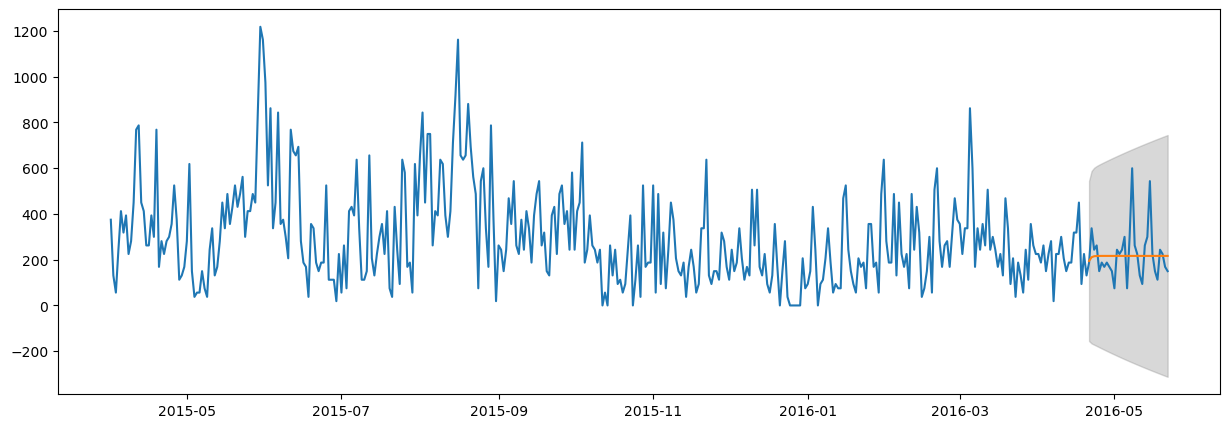

In [35]:
prediction_series = pd.Series(prediction,index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(eva_df)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

In [36]:
def add_to_table(table, name, extra_name, data, joining_indices):
    split_name = name.split("_")
    selected_elements = [split_name[idx] for idx in joining_indices]
    id_name = "_".join(selected_elements)
    id_name = id_name + extra_name
    
    if id_name in table:
        table[id_name] = table[id_name] + data
    else:
        table[id_name] = data

In [37]:
%%time
multi_items = ['FOODS_3_083_WI_3_evaluation', 'FOODS_3_084_WI_3_evaluation', 'FOODS_3_085_WI_3_evaluation']
df_test2 = df_test.loc[:,multi_items]

df_test2['actual_total'] = 0
df_test2['predicted_total'] = 0
for item in multi_items:
    df_test2['actual_total'] = df_test2['actual_total'] + df_test2[item]

train_df = df_test2['2016/04/01':'2016/05/15']
test_df = df_test2['2016/05/16':]

#Create a actual value dataframe and predicted value data frame
predicted_item = pd.DataFrame()
index_counter = 0
APE_df = pd.DataFrame()
MAPE_df = pd.DataFrame(columns =['id', 'MAPE'])
evaluating_data = pd.DataFrame()

joining_indices_store = [3,4]
joining_indices_item = [3,4,0,1]

for item in multi_items:
    #Create test and train table
    train = train_df.loc[:,item]
    test = test_df.loc[:,item]
    #Train the model
    auto_model = auto_arima(y=train, start_p=0, start_q=0, max_p=5,
                           max_q=5, start_P=0, start_Q=0, max_P=5,
                           max_Q=5, m=1, max_order=None,
                           trace=True)
    #Create a prediction
    prediction, confint = auto_model.predict(n_periods=test.size, return_conf_int=True)
    df_test2['predicted_total'] = df_test2['predicted_total'] + prediction
    new_column_name = f'{item}_predict'
    predicted_item[item] = prediction
    #Add APE to the table
    APE_df[item] = APE(test_df[item], prediction)
    #add MAPE to the table with item ID
    MAPE_df.loc[index_counter] =[item, MAPE(test_df[item], prediction)]
    
    #Modify the name of the predicted column
    forecast_column_name = f'{item}_predict'
    #Increment index counter to input to MAPE table
    index_counter = index_counter +1
    
    #create a column with store id
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_store)
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_item)
    add_to_table(evaluating_data,item,'', test, joining_indices_store)
    add_to_table(evaluating_data,item,'', test, joining_indices_item)    

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=553.605, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=554.863, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=554.777, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=627.711, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=556.771, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.108 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=200.754, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=202.135, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=201.880, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=238.225, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.070 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=147.511, Time=0.00 sec
 ARIMA

In [38]:
MAPE_df

,id,MAPE
0,FOODS_3_083_WI_3_evaluation,36.196581
1,FOODS_3_084_WI_3_evaluation,inf
2,FOODS_3_085_WI_3_evaluation,inf


In [39]:
APE_df

,FOODS_3_083_WI_3_evaluation,FOODS_3_084_WI_3_evaluation,FOODS_3_085_WI_3_evaluation
date,,,
2016-05-16,1.666667,35.555556,inf
2016-05-17,52.500000,inf,inf
2016-05-18,103.333333,inf,inf
2016-05-19,6.153846,35.555556,86.797490
2016-05-20,1.666667,35.555556,93.398745
2016-05-21,35.555556,57.037037,inf
2016-05-22,52.500000,35.555556,inf


In [40]:
evaluating_data

,WI_3_predict,WI_3_FOODS_3_predict,WI_3,WI_3_FOODS_3
2016-05-16,231.404279,231.404279,228.72,228.72
2016-05-17,231.451435,231.451435,149.84,149.84
2016-05-18,231.451435,231.451435,112.38,112.38
2016-05-19,231.451435,231.451435,250.43,250.43
2016-05-20,231.451435,231.451435,234.68,234.68
2016-05-21,231.451435,231.451435,174.51,174.51
2016-05-22,231.451435,231.451435,153.80,153.80


In [41]:
predicted_item

,FOODS_3_083_WI_3_evaluation,FOODS_3_084_WI_3_evaluation,FOODS_3_085_WI_3_evaluation
2016-05-16,228.506,2.552,0.346279
2016-05-17,228.506,2.552,0.393435
2016-05-18,228.506,2.552,0.393435
2016-05-19,228.506,2.552,0.393435
2016-05-20,228.506,2.552,0.393435
2016-05-21,228.506,2.552,0.393435
2016-05-22,228.506,2.552,0.393435


In [42]:
df_test2.head(5)

,FOODS_3_083_WI_3_evaluation,FOODS_3_084_WI_3_evaluation,FOODS_3_085_WI_3_evaluation,actual_total,predicted_total
date,,,,,
2015-04-01,374.60,1.98,0.00,376.58,NaN
2015-04-02,131.11,1.98,0.00,133.09,NaN
2015-04-03,56.19,0.00,0.00,56.19,NaN
2015-04-04,243.49,0.00,5.96,249.45,NaN
2015-04-05,412.06,3.96,0.00,416.02,NaN


In [43]:
def MAE(Y_actual, Y_Predicted):
    mae = np.mean(np.abs(Y_actual - Y_Predicted))
    return mae

In [44]:
%%time
multi_items = ['FOODS_3_083_WI_3_evaluation', 'FOODS_3_084_WI_3_evaluation', 'FOODS_3_085_WI_3_evaluation']
df_test2 = df_test.loc['2016/04/01':,multi_items]

df_test2['actual_total'] = 0
df_test2['predicted_total'] = 0
for item in multi_items:
    df_test2['actual_total'] = df_test2['actual_total'] + df_test2[item]

train_df = df_test2['2016/04/01':'2016/05/15']
test_df = df_test2['2016/05/01':]

#Create a actual value dataframe and predicted value data frame
predicted_item = pd.DataFrame()
index_counter = 0
APE_df = pd.DataFrame()
MAPE_MAE_df = pd.DataFrame(columns =['id', 'error', 'MAE or MAPE'])
evaluating_data = pd.DataFrame()

joining_indices_store = [3,4]
joining_indices_item = [3,4,0,1]
#Add items to the id

MAPE_MAE_df['id'] = multi_items
for item in multi_items:
    #Create test and train table
    train = train_df.loc[:,item]
    test = test_df.loc[:,item]
    #Train the model
    auto_model = auto_arima(y=train, start_p=0, start_q=0, max_p=5,
                           max_q=5, start_P=0, start_Q=0, max_P=5,
                           max_Q=5, m=1, max_order=None,
                           trace=True)
    #Create a prediction
    prediction, confint = auto_model.predict(n_periods=test.size, return_conf_int=True)
    new_column_name = f'{item}_predict'
    predicted_item[item] = prediction
    df_test2['predicted_total'] = df_test2['predicted_total'] + predicted_item[item]
    #Add APE to the table
    #APE_df[item] = APE(test_df[item], prediction)
    
    #Check for zero values in actual value
    #if zero value is found, find error value with MAE
    #if there is no zero then use MAPE
    if np.any(test_df[item] == 0.0):
       MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'error'] = MAE(test_df[item], prediction)
       MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'MAE or MAPE'] = 'MAE'
    else:
       MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'error'] = MAPE(test_df[item], prediction)
       MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'MAE or MAPE'] = 'MAPE'       
    
    #Modify the name of the predicted column
    forecast_column_name = f'{item}_predict'
    #Increment index counter to input to MAPE table
    index_counter = index_counter +1
    
    #create a column with store id
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_store)
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_item)
    add_to_table(evaluating_data,item,'', test, joining_indices_store)
    add_to_table(evaluating_data,item,'', test, joining_indices_item)    

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=553.605, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=554.863, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=554.777, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=627.711, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=556.771, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.069 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=200.754, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=202.135, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=201.880, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=238.225, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.072 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=147.511, Time=0.00 sec
 ARIMA

In [ ]:
df_test2.tail(10)

In [ ]:
MAPE_MAE_df

In [ ]:
df_test2.head(10)

In [ ]:
predicted_item

In [ ]:
MAPE_MAE_df = pd.DataFrame(columns =['id', 'error', 'MAE or MAPE'])
evaluating_data = pd.DataFrame()

joining_indices_store = [3,4]
joining_indices_item = [3,4,0,1]
MAPE_MAE_df['id'] = multi_items

In [ ]:
MAPE_MAE_df

In [ ]:
df_test3 = df.copy()
df_test3 = df_test3.set_index('date')

Now try with 250 items and longer time frame

In [ ]:
import random
#Cerate a list of items from current table
items = []

for col in df_test3.columns:
    if (len(col.split('_')) == 6):
        if (col.split('_')[5] == 'evaluation'):
            items.append(col)

#Select random items from the list of total items
#Number of random values
n_random = 250
random_item = random.sample(items, n_random)

df_test2 = df_test3.loc['2015/04/01':,random_item]
df_test2['predicted_total'] = 0
df_test2['actual_total'] = 0

for item in random_item:
    df_test2['actual_total'] = df_test2['actual_total'] + df_test2[item]

train_df = df_test3.loc['2015/04/01':'2016/04/21',random_item]
#df_test2['2015/04/01':'2016/04/21']
test_df = df_test3.loc['2016/04/22':,random_item]
#df_test2['2016/04/22':]

#Create a actual value dataframe and predicted value data frame
predicted_item = pd.DataFrame()
index_counter = 0
MAPE_MAE_df = pd.DataFrame(columns =['id', 'error', 'MAE or MAPE'])
evaluating_data = pd.DataFrame()
cf_total= pd.DataFrame()
cf_total['low'] = 0
cf_total['high'] = 0
joining_indices_store = [3,4]
joining_indices_item = [3,4,0,1]

for item in random_item:
    #Create test and train table
    train = train_df.loc[:,item]
    test = test_df.loc[:,item]
    #Train the model
    auto_model = auto_arima(y=train, start_p=1, start_q=0, max_p=5,
                           max_q=5, start_P=1, start_Q=0, max_P=5,
                           max_Q=5, m=1, max_order=None,
                           trace=True, seasonal=True)
    #Create a prediction
    prediction, confint = auto_model.predict(n_periods=test.size, return_conf_int=True)
    cf= pd.DataFrame(confint)
    if np.any(cf_total) == 0:
        cf_total['low'] =  cf[0]
        cf_total['high'] = cf[1]

    elif np.any(np.isnan(cf)) == False:
        cf_total['low'] = cf_total['low'] + cf[0]
        cf_total['high'] = cf_total['high'] + cf[1]

    new_column_name = f'{item}_predict'
    predicted_item[item] = prediction
    df_test2['predicted_total'] = df_test2['predicted_total'] + predicted_item[item]
    #Check for zero values in actual value
    #if zero value is found, find error value with MAE
    #if there is no zero then use MAPE
    if np.any(test_df == 0.0):
        MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'error'] = MAE(test_df[item], prediction)
        MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'MAE or MAPE'] = 'MAE'
    else:
        MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'error'] = MAPE(test_df[item], prediction)
        MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'MAE or MAPE'] = 'MAPE'       

    #Modify the name of the predicted column
    forecast_column_name = f'{item}_predict'
    #Increment index counter to input to MAPE table
    index_counter = index_counter +1
    
    #create a column with store id
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_store)
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_item)
    add_to_table(evaluating_data,item,'', test, joining_indices_store)
    add_to_table(evaluating_data,item,'', test, joining_indices_item)  


In [ ]:
prediction_series = pd.Series(df_test2['predicted_total'],index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(df_test2['actual_total'], label = 'actual_total')
ax.plot(prediction_series, label = 'predicted_total')
ax.fill_between(prediction_series.index,
                cf_total['low'],
                cf_total['high'],color='grey',alpha=.3)
ax.legend(loc='lower left')

The graph is stright due to too much noise probably better to devide them into different food category and stores. It would be best if you can use autoML as well since you cant use same model for all the items making prediction weak

In [ ]:
# Filter rows containing 'MAE' in 'MAE or MAPE' column
mae_rows = MAPE_MAE_df[MAPE_MAE_df['MAE or MAPE'].str.contains('MAE')]

# Calculate the average of 'error' for rows with 'MAE'
average_mae = mae_rows['error'].mean()

# Filter rows containing 'MAPE'in 'MAE or MAPE' column
mape_rows = MAPE_MAE_df[MAPE_MAE_df['MAE or MAPE'].str.contains('MAPE')]

# Calculate the average of 'error' for rows with 'MAPE'
average_mape = mape_rows['error'].mean()

# Print the results
print(f'Average error for rows with "MAE": {average_mae}')
print(f'Average error for rows with "MAPE": {average_mape}')

In [ ]:
MAPE_MAE_df

Use AutoML

In [ ]:
# mljar-supervised package
from supervised.automl import AutoML
from sklearn.model_selection import train_test_split

In [ ]:
%%time
multi_items = ['FOODS_3_083_WI_3_evaluation'] +['date']
# multi_item_and_calender =multi_items + calender +['date']
multi_item_and_calender =multi_items
df_test2 = df.loc[:,multi_item_and_calender]

# df_test2['actual_total'] = 0
# df_test2['predicted_total'] = 0
# for item in multi_items:
#     df_test2['actual_total'] = df_test2['actual_total'] + df_test2[item]
df2 = df_test2.loc[df_test2['date'] >='2016/04/01'].copy()
# df2 = df2.reset_index()
df2['date'] = pd.to_datetime(df2['date'], format = '%Y-%m-%d')

train_df = df2.loc[df2['date'] <='2016/05/01'].copy()
test_df = df2.loc[df2['date'] >'2016/05/01'].copy()

for item in multi_items:
    #Create test and train table
    # train, test = train_test_split(df2, test_size=0.2, shuffle=False)
    # df2_train = df2.drop(item, axis =1)
    X_train = train_df['date']
    Y_train = train_df.drop(item, axis = 1)
    X_test = test_df['date']
    Y_test = test_df.drop(item, axis = 1)
    # X_train, X_test, Y_train, Y_test = train_test_split(df2_train, df2[item], test_size=0.2, shuffle=False)
    # train_df = df2.loc['2015/04/01':'2016/04/21',random_item]

    target_column = item
    time_column = 'date' 
    automl = AutoML(results_path = "AutoML_{item}",
                    mode="Explain",
                    eval_metric='accuracy')
    print(1)
    automl.fit(X_train, Y_train)
    print(2)

In [ ]:
df_test2

In [ ]:
multi_items = ['FOODS_3_083_WI_3_evaluation', 'FOODS_3_084_WI_3_evaluation', 'FOODS_3_085_WI_3_evaluation'] 
multi_item_and_calender =multi_items + calender
df_test2 = df.loc[:,multi_item_and_calender]
df_test2

In [ ]:
AutoML(eval_metric='accuracy', mode='Perform', results_path = 'AutoML_Perform')

In [ ]:
automl.report()

In [ ]:
automl.report()

In [ ]:
t

In [ ]:
automl = AutoML(
    results_path = "AutoML_Optuna",
    mode = "Optuna",
    algorithms = ["Xgboost"],
    optuna_time_budget = 120,
    eval_metric = "auc",
    boost_on_errors = False,
    train_ensemble = False
)
automl.fit(X_train, Y_train)
    

In [ ]:
probas = automl.predict_proba(X_test)
labels = autmo.predict(X_test)
autml.predict_all(X_test)